In [481]:
import pandas as pd
import os 
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as pl
from ggplot import *
import seaborn as sns
from math import radians,cos,sin,asin,sqrt
import calendar
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
os.chdir("C:/Users/Mahesh/Desktop/Final Project")


In [24]:
train_cab = pd.read_csv("train_cab.csv")



The train_cab excel file contains the following variable along with the details :


1.pickup_datetime - timestamp value indicating when the cab ride started.

2.pickup_longitude - float for longitude coordinate of where the cab ride started.


3.pickup_latitude - float for latitude coordinate of where the cab ride started.
    

4.dropoff_longitude - float for longitude coordinate of where the cab ride ended.
    

5.dropoff_latitude - float for latitude coordinate of where the cab ride ended.
    

6.passenger_count - an integer indicating the number of passengers in the cab ride.


In [4]:
train_cab.dtypes


fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

Data Cleaning - Before performing any pre-processing techniques such as Missing Value Analysis or Feature Engineering , it is imperative that we get rid of the invalid values  

In this case , we'll first deal with invalid passenger_count i.e number of passengers in a car and remove them 

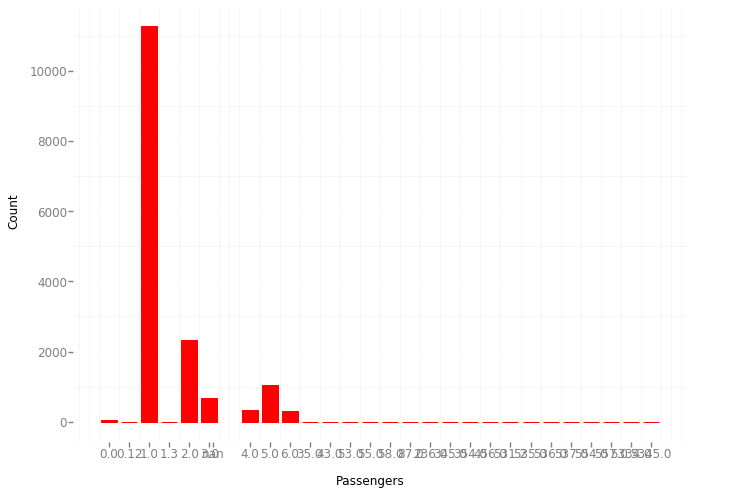

<ggplot: (158441075148)>

In [25]:
ggplot(train_cab , aes(x="passenger_count")) + geom_bar( fill = "red") + theme_bw() +  xlab("Passengers") + ylab("Count")


As we can see there's number of passengers present which are less than 1 , which is impossible.
Hence, we need to remove them

In [26]:
train_cab[train_cab['passenger_count'] < 1 ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19 UTC,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33 UTC,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14 UTC,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16 UTC,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02 UTC,-73.968100,40.762500,-73.984400,40.760900,0.00


In [27]:
len(train_cab[train_cab['passenger_count'] < 1 ])

58

In [28]:
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] < 1  ].index)

In [29]:
train_cab.shape
#58 rows have been removed.

(16009, 7)

From the above graph , we can observe there's no negative values but the prsence of peculiar value still exists 
such as passenger_count with value = 1.3 and some greater than 6 - which needs to be removed.


That is one of the underlying assumption - maximum passenger count in a cab is 6 - beyond that is dissmissed

In [30]:
(train_cab[train_cab['passenger_count'] > 6 ])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345.0


In [31]:
print(len(train_cab[train_cab['passenger_count'] > 6 ]))
print("Total number of Passenger count greater than 6 = {}".format(len(train_cab[train_cab['passenger_count'] > 6 ])))
print("Total number of rows present before removing Passenger count exceeding 6 ={}".format(train_cab.shape[0]))
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] > 6 ].index)
print("Total number of rows present after removing Passenger count exceeding 6 is {}".format(train_cab.shape[0]))


20
Total number of Passenger count greater than 6 = 20
Total number of rows present before removing Passenger count exceeding 6 =16009
Total number of rows present after removing Passenger count exceeding 6 is 15989


In total , 78 variables gets removed due to invalid passenger count

In [32]:
df = train_cab.copy()
df.shape
#Creating a copy 
train_cab.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


Dealing with latitudes and longitudes 


The latitude valid values are between -90 and 90 , the boundaries being inclusive
The longitude valid values are bewtween -180 and 180 , the boundaries being inclusive as well.

In [33]:
print('pickup_longitude above 180={}'.format(sum(train_cab['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train_cab['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train_cab['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train_cab['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train_cab['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train_cab['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train_cab['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train_cab['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [34]:
train_cab = train_cab.drop(train_cab[train_cab['pickup_latitude'] > 90 ].index)
print("Total number of rows present after removing invalid latitude is {}".format(train_cab.shape[0]))


Total number of rows present after removing invalid latitude is 15988


In [35]:
df = train_cab.copy()

We need to calculate Distance based off of longitudes and longitude in kilometers with the help of Haversine formula.

In [36]:
distance_new= []
for i in range(0, len(train_cab ) ):
    #pck_lat,drp_lat = np.radians(train_cab['pickup_longitude'].iloc[i]) ,np.radians(train_cab['dropoff_longitude'].iloc[i]) 
    lon1, lat1  = map(radians, [ train_cab['pickup_longitude'].iloc[i], train_cab['pickup_latitude'].iloc[i]])
    lon2 , lat2 = map(radians, [train_cab['dropoff_longitude'].iloc[i], train_cab['dropoff_latitude'].iloc[i] ] ) 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    distance_new.append(6371*c)


In [37]:
train_cab['Distance'] = distance_new
train_cab.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157


In [17]:
train_cab[train_cab['Distance'] == 0 ]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
11,5.5,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3.0,0.0
15,5,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
105,52,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0
124,8,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2.0,0.0
191,6.5,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0
192,3.7,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0,0.0
270,7.5,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0
273,8.1,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4.0,0.0
290,6.9,2009-12-14 12:33:00 UTC,-73.982432,40.745747,-73.982432,40.745747,1.0,0.0


In [18]:
len(train_cab[train_cab['Distance'] == 0])

456

Removal of rows where Distance is equal to 0 

In [38]:
print("Before removing 0 distance , the rows present were {}".format(train_cab.shape[0]))
train_cab = train_cab.drop(train_cab[train_cab['Distance'] == 0].index)
print("After removing 0 distance , the rows present equals {}".format(train_cab.shape[0]))


Before removing 0 distance , the rows present were 15988
After removing 0 distance , the rows present equals 15532


Now onto the removal of latitudes and longitudes where they equal 0

In [39]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train_cab[i]==0)))

pickup_longitude equal to 0=10
pickup_latitude equal to 0=10
dropoff_longitude equal to 0=11
dropoff_latitude equal to 0=9


In [40]:
df = train_cab.copy()

In [41]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train_cab = train_cab.drop(train_cab[train_cab[i]==0].index)

In [42]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train_cab[i]==0)))

pickup_longitude equal to 0=0
pickup_latitude equal to 0=0
dropoff_longitude equal to 0=0
dropoff_latitude equal to 0=0


Successful removal of zero's latitudes and longitudes 


In [43]:
train_cab.shape

(15511, 8)

The number of rows further went down from 15532 to 15511

Now onto the fare_amount

In [44]:
train_cab['fare_amount'].dtypes # Object type which needs to get converted to integer 

dtype('O')

In [45]:
train_cab['fare_amount'] = pd.to_numeric(train_cab['fare_amount'])

ValueError: Unable to parse string "430-" at position 1076

In [46]:
train_cab.iloc[1076,:]

fare_amount                             430-
pickup_datetime      2009-09-22 19:01:01 UTC
pickup_longitude                    -73.9796
pickup_latitude                      40.7713
dropoff_longitude                   -73.9758
dropoff_latitude                      40.782
passenger_count                            1
Distance                             1.22653
Name: 1123, dtype: object

The above row needs to get removed as it's of invalid format.

In [47]:
train_cab = train_cab.drop(train_cab.index[1076])

In [48]:
train_cab['fare_amount'] = pd.to_numeric(train_cab['fare_amount'])

In [49]:
train_cab.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157


In [50]:
%matplotlib inline

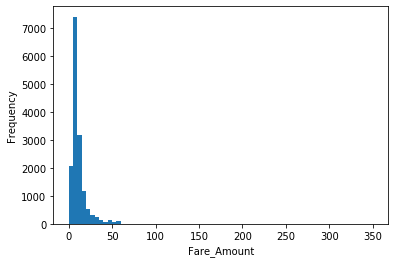

In [51]:
bin_edges =  [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,350]      #[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50,55,60,65,70,80,100,200,300,]
pl.hist(train_cab['fare_amount'] , bins = bin_edges)
pl.xlabel("Fare_Amount")
pl.ylabel("Frequency")
pl.show()

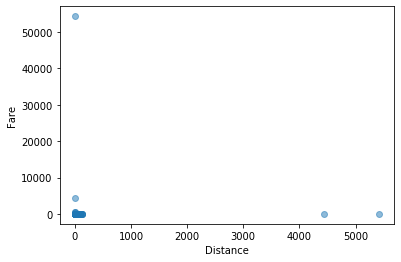

In [52]:
#ggplot(train_cab , aes(x="Distance" , y = "fare_amount")) + geom_point()


pl.scatter(train_cab['Distance'] , train_cab['fare_amount'] , alpha = 0.5)
pl.xlabel("Distance")
pl.ylabel("Fare")
pl.show()

From the above scatterplot we can observe some peculiar observations : 
2 Observations where the distance exceeds 1000 km yet the fare remains very bare minimum.
It's better to remove these observations as its meaningless 
The other is the one with very high fare_amount yet minimal distance

In [53]:
train_cab[train_cab['Distance'] > 1000 ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
5864,8.5,2012-03-04 01:35:00 UTC,-73.99503,40.744945,-7.986640,40.729937,1.0,5420.988959
7014,4.5,2011-06-18 04:03:00 UTC,-73.98898,40.721697,-74.001073,0.728087,3.0,4447.086698


In [54]:
train_cab.shape

(15510, 8)

In [55]:
train_cab = train_cab.drop(train_cab[train_cab['Distance'] > 1000 ].index)

In [56]:
train_cab.shape # Successful removal of two outliers

(15508, 8)

In [57]:
train_cab[train_cab['fare_amount'] > 1000 ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
1015,54343.0,2015-02-27 17:03:50 UTC,-74.003319,40.727455,-73.964470,40.764378,1.0,5.250392
1072,4343.0,2012-01-15 20:42:04 UTC,-73.976309,40.751634,-74.014854,40.709044,1.0,5.742518


Better to remove the above 2 observations as the passenger count is 1 , distance is less but the fare_amount seems massively out of proportion

In [58]:
print("Before removal , number of rows is {}".format(train_cab.shape[0]))
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'] > 1000 ].index)
print("Before removal , number of rows present {}".format(train_cab.shape[0]))

Before removal , number of rows is 15508
Before removal , number of rows present 15506


In [59]:
df = train_cab.copy()

Missing Value Analysis : Now once the data has been cleaned , it is important to look into the amount of missing values present in the data set and come up with ways of imputing it.


In [60]:
missing_val = pd.DataFrame(train_cab.isnull().sum())
missing_val = missing_val.reset_index()
print(missing_val)
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

               index   0
0        fare_amount  21
1    pickup_datetime   0
2   pickup_longitude   0
3    pickup_latitude   0
4  dropoff_longitude   0
5   dropoff_latitude   0
6    passenger_count  55
7           Distance   0


,Variables,Missing_percentage
0,fare_amount,21
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,Distance,0


In [61]:
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train_cab))*100
missing_val
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)



           Variables  Missing_percentage
0    passenger_count            0.354701
1        fare_amount            0.135431
2    pickup_datetime            0.000000
3   pickup_longitude            0.000000
4    pickup_latitude            0.000000
5  dropoff_longitude            0.000000
6   dropoff_latitude            0.000000
7           Distance            0.000000


In [269]:
#train_cab['fare_amount'].iloc[700] = 7.0 
train_cab['fare_amount'].iloc[700] = np.nan
train_cab.iloc[700]

fare_amount                              NaN
pickup_datetime      2015-03-01 02:08:36 UTC
pickup_longitude                    -73.9864
pickup_latitude                      40.7224
dropoff_longitude                   -73.9915
dropoff_latitude                     40.7352
passenger_count                            1
Distance                             1.49159
Name: 732, dtype: object

Values can be imputed with trial and error method via following ways: 1.Mean 2.Median and 3.KNN.

Choosing a random variable and replacing it with N.A 

Actual Value = 7.0

Mean imputed value = 11.364500774993536

Mean iMPUTED value = 8.5

KNN Imputed Value = 6.07

As the value with KNN is closest to the actual value , KNN method is used for imputing the values.

In [270]:
train_cab = train_cab.fillna(train_cab.mean())

In [274]:
train_cab['fare_amount'].iloc[700] # Mean infused value 

11.364500774993536

In [275]:
train_cab = df.copy()


In [279]:
#train_cab['fare_amount'].iloc[700]
train_cab['fare_amount'].iloc[700] = np.nan


In [281]:
train_cab = train_cab.fillna(train_cab.median())

In [282]:
train_cab['fare_amount'].iloc[700] # Median infused value

8.5

In [293]:
train_cab = df.copy()

Before performing KNN Imputation , it is imperative to change the type of pickup_datetime from string to datetype

In [62]:
train_cab['pickup_datetime'] = pd.to_datetime( train_cab['pickup_datetime'],format ="%Y-%m-%d %H:%M:%S UTC")
#Error is due to index 1327

ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC' (match)

In [63]:
train_cab[train_cab['pickup_datetime'] =="43"]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
1327,11.5,43,-73.981947,40.7282,-73.988582,40.759202,1.0,3.492289


In [64]:
train_cab = train_cab.drop(train_cab[train_cab['pickup_datetime'] == "43"].index)

In [65]:
train_cab['pickup_datetime'] = pd.to_datetime( train_cab['pickup_datetime'],format ="%Y-%m-%d %H:%M:%S UTC")


In [66]:
df = train_cab.copy() # creating a copy


Before performing KNN Imputation , it is imperative to seperate the datetime object from the dataframe as it cannot be processed via KNN


In [69]:
datetime = pd.DataFrame(train_cab['pickup_datetime'])


In [70]:
train_cab = train_cab.drop(columns = "pickup_datetime") #Removing the datetime in order to facilitate the KNN imputation


In [312]:
train_cab = pd.DataFrame(train_cab)

In [326]:
train_cab['fare_amount'].iloc[700] = np.nan


In [327]:
train_cab = pd.DataFrame( KNN(k=3).fit_transform(train_cab) , columns=train_cab.columns) 

Imputing row 1/15505 with 0 missing, elapsed time: 904.065
Imputing row 101/15505 with 0 missing, elapsed time: 930.925
Imputing row 201/15505 with 0 missing, elapsed time: 940.831
Imputing row 301/15505 with 0 missing, elapsed time: 946.273
Imputing row 401/15505 with 0 missing, elapsed time: 947.796
Imputing row 501/15505 with 0 missing, elapsed time: 952.086
Imputing row 601/15505 with 0 missing, elapsed time: 956.384
Imputing row 701/15505 with 1 missing, elapsed time: 961.559
Imputing row 801/15505 with 0 missing, elapsed time: 963.455
Imputing row 901/15505 with 0 missing, elapsed time: 964.881
Imputing row 1001/15505 with 0 missing, elapsed time: 965.136
Imputing row 1101/15505 with 0 missing, elapsed time: 965.138
Imputing row 1201/15505 with 0 missing, elapsed time: 965.139
Imputing row 1301/15505 with 0 missing, elapsed time: 965.221
Imputing row 1401/15505 with 0 missing, elapsed time: 965.519
Imputing row 1501/15505 with 0 missing, elapsed time: 965.521
Imputing row 1601/15

In [328]:
train_cab.iloc[700]

fare_amount           6.067637
pickup_longitude    -73.986427
pickup_latitude      40.722385
dropoff_longitude   -73.991516
dropoff_latitude     40.735233
passenger_count       1.000000
Distance              1.491587
Name: 700, dtype: float64

In [332]:
train_cab = df.copy()

In [335]:
train_cab = train_cab.drop(columns = "pickup_datetime")

In [76]:
train_cab = pd.DataFrame( KNN(k=3).fit_transform(train_cab) , columns=train_cab.columns) 

Imputing row 1/15505 with 0 missing, elapsed time: 216.899
Imputing row 101/15505 with 0 missing, elapsed time: 226.861
Imputing row 201/15505 with 0 missing, elapsed time: 228.044
Imputing row 301/15505 with 0 missing, elapsed time: 228.209
Imputing row 401/15505 with 0 missing, elapsed time: 228.381
Imputing row 501/15505 with 0 missing, elapsed time: 228.826
Imputing row 601/15505 with 0 missing, elapsed time: 229.233
Imputing row 701/15505 with 0 missing, elapsed time: 229.671
Imputing row 801/15505 with 0 missing, elapsed time: 229.902
Imputing row 901/15505 with 0 missing, elapsed time: 230.064
Imputing row 1001/15505 with 0 missing, elapsed time: 230.090
Imputing row 1101/15505 with 0 missing, elapsed time: 230.092
Imputing row 1201/15505 with 0 missing, elapsed time: 230.096
Imputing row 1301/15505 with 0 missing, elapsed time: 230.187
Imputing row 1401/15505 with 0 missing, elapsed time: 230.267
Imputing row 1501/15505 with 0 missing, elapsed time: 230.268
Imputing row 1601/15

In [99]:
train_cab['passenger_count'].unique()

array([1.        , 2.        , 3.        , 1.59010223, 6.        ,
       5.        , 4.        , 1.00000002, 2.75328005, 1.89460222,
       2.72377507, 0.99999997, 1.21439233, 0.99999998, 4.20875616,
       1.07814476, 1.00000006, 1.2432795 , 0.99999998, 1.76656834,
       1.37344156, 1.15785633, 1.13187256, 1.49514309, 2.44071478,
       4.01927776, 1.00000005, 4.10127709, 1.4040825 , 0.99999999,
       1.19218806, 1.52887782, 1.37135704, 1.16627828, 1.00000001,
       2.69661585, 1.00000004, 1.00000001, 1.85893497, 1.67166985,
       0.99999996, 1.42028065, 1.66403241, 0.99999997, 1.00000002,
       1.26638456, 0.99999994, 1.86220802, 0.99999998, 1.2179593 ,
       1.5055257 , 0.99999995, 2.34945612, 0.99999996, 1.00000002,
       1.59874399, 1.70740415, 2.25343313, 1.77090421, 3.13806757,
       1.3       , 2.17201789])

Rounding off the passenger_count off to the next whole number 

In [105]:
train_cab['passenger_count'] = np.ceil(train_cab['passenger_count'])

In [107]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int')

In [108]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('object').astype('category',ordered = True)

C:\Users\Mahesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
datetime['date'] = datetime['pickup_datetime'].dt.date

In [83]:
datetime['Month'] = datetime['pickup_datetime'].apply(lambda x : x.month )


In [85]:
datetime['Year'] = datetime['pickup_datetime'].apply(lambda x : x.year)

In [87]:
datetime['Day'] = datetime['pickup_datetime'].apply(lambda x : x.day)

In [89]:
datetime['Hour'] = datetime['pickup_datetime'].apply(lambda x : x.hour)

In [93]:
datetime['Day of the Week'] = datetime['pickup_datetime'].apply(lambda x : calendar.day_name[x.weekday()] )

In [166]:
datetime.dtypes

date               object
Month               int64
Year                int64
Day                 int64
Hour                int64
Day of the Week    object
dtype: object

Merging datetime into train_cab 

In [179]:
train_cab = pd.merge(datetime,train_cab,right_index=True,left_index=True)

Removing latitudes and longitudes as it's not required anymore

In [191]:
rain_cab = train_cab.drop(columns = {"pickup_longitude","pickup_latitude","dropoff_latitude","dropoff_longitude"})
train_cab['date'] = train_cab.drop(columns="date")

OUTLIER ANALYSIS

In [256]:
df = train_cab.copy()

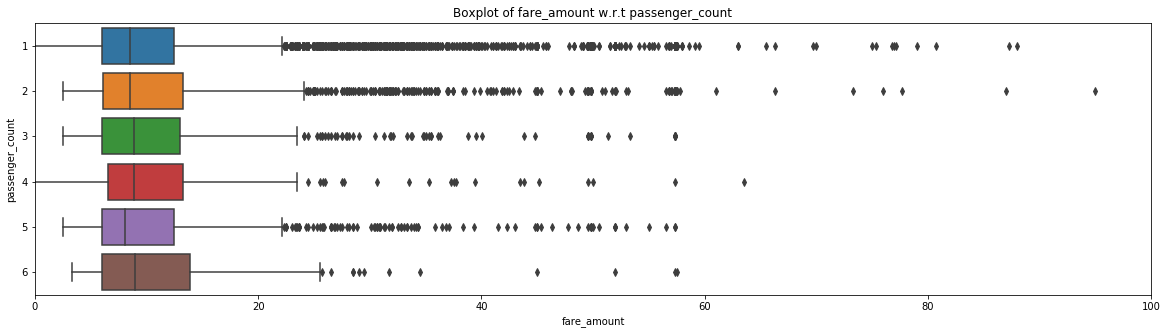

In [239]:
pl.figure(figsize=(20,5))
pl.xlim(0,100)
s= sns.boxplot(x=train_cab['fare_amount'],y=train_cab['passenger_count'],data=train_cab,orient='h')
pl.title('Boxplot of fare_amount w.r.t passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
pl.show(s)


From the above boxplat , it can be seen that the maximum average fare_amount is for passenger_count no 6 which makes sense.
Also, maximum number of outliers is for passenger count = 1 

Let's get a rough idea of the number of outliers present across the dataframe

In [252]:
len(train_cab[train_cab['fare_amount'] > 20])

1574

Its important that we detect these , nullify it and impute it with the help of KNN Imputation as not doing it will otherwise cause deflection in our predictive modelling.


In [262]:
q75 , q25 = np.percentile(train_cab['fare_amount'] , [75,25] )
print("75th percentile is {}".format(q75))
print("25th percentile is {}".format(q25))
iqr = q75 - q25
print("Inner quartile range is {}".format(iqr))
min , max= q25 - (iqr*1.5) , q75 + (iqr*1.5)
print("Maximum fare_amount should be{}".format(max))
print("Minimum fare_amount should be{}".format(min))

75th percentile is 12.5
25th percentile is 6.0
Inner quartile range is 6.5
Maximum fare_amount should be22.25
Minimum fare_amount should be-3.75


Presence of minimum fare_amount which must've creeped in while performing KNN Imputation

In [265]:
train_cab[train_cab['fare_amount'] < 0 ]

,date,Month,Year,Day,Hour,Day of the Week,fare_amount,passenger_count,Distance
1954,5,5,2011,17,20,Tuesday,-2.9,1,0.184225
2390,4,4,2010,29,22,Thursday,-2.5,1,0.021244
12584,4,4,2010,26,12,Monday,-3.0,4,0.096377


In [316]:
train_cab = df.copy()

In [318]:
train_cab.loc[train_cab['fare_amount'] < 0 , 'fare_amount' ] = None
train_cab.loc[train_cab['fare_amount'] > max, 'fare_amount'] = None 
        

In [319]:
train_cab.isnull().sum()

date                  0
Month                 0
Year                  0
Day                   0
Hour                  0
Day of the Week       0
fare_amount        1312
passenger_count       0
Distance              0
dtype: int64

In [321]:
train_cab.dtypes

date                 object
Month                 int64
Year                  int64
Day                   int64
Hour                  int64
Day of the Week      object
fare_amount         float64
passenger_count    category
Distance            float64
dtype: object

In [323]:
day =[]

In [324]:
for i in range( 0 , len(train_cab)) :
    if( train_cab['Day of the Week'].iloc[i] == 'Monday'):
        day.append(1)
    if( train_cab['Day of the Week'].iloc[i] == 'Tuesday'):
        day.append(2)
    if( train_cab['Day of the Week'].iloc[i] == 'Wednesday'):
        day.append(3)
    if( train_cab['Day of the Week'].iloc[i] == 'Thursday'):
        day.append(4)
    if( train_cab['Day of the Week'].iloc[i] == 'Friday'):
        day.append(5)
    if( train_cab['Day of the Week'].iloc[i] == 'Saturday'):
        day.append(6)
    if( train_cab['Day of the Week'].iloc[i] == 'Sunday'):
        day.append(7)
         

In [329]:
train_cab['day of the week'] = day

In [331]:
train_cab = train_cab.drop(columns = "Day of the Week")

In [334]:
train_cab = pd.DataFrame( KNN(k=3).fit_transform(train_cab) , columns=train_cab.columns) 

Imputing row 1/14964 with 0 missing, elapsed time: 169.059
Imputing row 101/14964 with 0 missing, elapsed time: 174.173
Imputing row 201/14964 with 0 missing, elapsed time: 175.200
Imputing row 301/14964 with 0 missing, elapsed time: 176.160
Imputing row 401/14964 with 0 missing, elapsed time: 177.794
Imputing row 501/14964 with 0 missing, elapsed time: 178.990
Imputing row 601/14964 with 0 missing, elapsed time: 179.709
Imputing row 701/14964 with 1 missing, elapsed time: 180.221
Imputing row 801/14964 with 0 missing, elapsed time: 180.546
Imputing row 901/14964 with 0 missing, elapsed time: 180.687
Imputing row 1001/14964 with 0 missing, elapsed time: 180.960
Imputing row 1101/14964 with 0 missing, elapsed time: 181.135
Imputing row 1201/14964 with 0 missing, elapsed time: 181.406
Imputing row 1301/14964 with 0 missing, elapsed time: 181.651
Imputing row 1401/14964 with 0 missing, elapsed time: 181.970
Imputing row 1501/14964 with 0 missing, elapsed time: 182.437
Imputing row 1601/14

In [340]:
np.max(train_cab['fare_amount'])

22.1

Outlier Analysis Completed

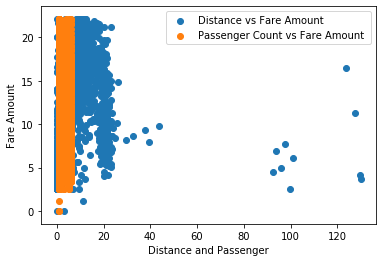

In [341]:
pl.scatter(train_cab['Distance'],train_cab['fare_amount'],)
pl.scatter(train_cab['passenger_count'],train_cab['fare_amount'])
pl.ylabel("Fare Amount")
pl.xlabel("Distance and Passenger")
pl.legend(("Distance vs Fare Amount" , "Passenger Count vs Fare Amount "))
pl.show()

In [243]:
train_cab.dtypes


In [244]:
for i in cat:
    print(i)
    chi2 , p , dof , ex = chi2_contingency(pd.crosstab(train_cab['fare_amount'],train_cab[i]))
    print(p)

date
0.37558732082950863
Day of the Week
0.7156866882327797
passenger_count
0.1864912930228394


In [354]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int')
train_cab['day of the week'] = train_cab['day of the week'].astype('int')
train_cab['Year'] = train_cab['Year'].astype('int')

In [355]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('object').astype('category',ordered = True)
train_cab['day of the week'] = train_cab['day of the week'].astype('object').astype('category',ordered = True)
train_cab['Year'] = train_cab['Year'].astype('object').astype('category',ordered = True)

In [357]:
df = train_cab.copy()

Chi square test

In [366]:
cnumeric = ["fare_amount","date","Month","Year","Hour","Distance"]

In [367]:
train_cab_corr = train_cab.loc[:,cnumeric]

In [368]:
corr = train_cab_corr.corr()

In [370]:
cat=["day of the week","passenger_count","Year"]

In [371]:
for i in cat:
    print(i)
    chi2 , p , dof , ex = chi2_contingency(pd.crosstab(train_cab['fare_amount'],train_cab[i]))
    print(p)

day of the week
0.597792423660674
passenger_count
0.03508018393995366
Year
0.4724249316638036


We can get rid of the variables - "day of the week" and "Year Count" as the p value is greater than 0.05
Sensibly , p value for  passenger_count is less than 0.05.

In [372]:
train_cab  = train_cab.drop(columns = {"day of the week" , "Year"})

In [374]:
df = train_cab.copy()

Building a model : Since its a regression based problem , we'll use Linear Regression , Decision Tree Regression or Random Forest Regression

Linear Regression Model 

In [460]:
train,test = train_test_split(train_cab, test_size=0.2)

In [387]:
import statsmodels.api as sm #Library for Linear Regression

In [461]:
fare = train['fare_amount']
train = train.drop(columns = "fare_amount")
train['fare_amount'] = fare
#Rearranging the columns
fare_2 = test['fare_amount']
test = test.drop(columns = "fare_amount")
test['fare_amount'] =fare_2

In [539]:
model = sm.OLS(train.iloc[:,6].astype(float),train.iloc[:,0:6].astype(float)).fit()
#type casting the data frames

In [540]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                          1.081e+04
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                        0.00
Time:                        17:36:18   Log-Likelihood:                         -34891.
No. Observations:               11971   AIC:                                  6.979e+04
Df Residuals:                   11966   BIC:                                  6.983e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
date                0.1418      0.005     27.348      0.000       0.132       0.152
Month               0.1418      0.005     27.348      0.000       0.132       0.152
Day                 0.1180      0.004     28.603      0.000       0.110       0.126
Hour                0.1780      0.005     34.133      0.000       0.168       0.188
passenger_count     0.6081      0.030     20.073      0.000       0.549       0.667
Distance            0.5533      0.009     63.927      0.000       0.536       0.570
==============================================================================
Omnibus:                     5794.100   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319626.889
Skew:                          -1.549   Prob(JB):                         0.00
Kurtosis:                      28.124   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [543]:
prediction_LR = model.predict(test.iloc[:,0:6])

In [545]:
#Calculate MAPE 
MAPE(test.iloc[:,9] , prediction_LR)

IndexError: single positional indexer is out-of-bounds

Decision Tree Model 

In [534]:
fit = DecisionTreeRegressor( max_depth=10).fit(train.iloc[:,0:6] , train.iloc[:,6])

In [530]:
fit


DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [535]:
predictions_Dt = fit.predict(test.iloc[:,0:6])


In [532]:
len(predictions_Dt)

2993

In [456]:
test.iloc[:,6]

3742      5.300000
5665      9.700000
3706      9.700000
7328      7.100000
4856      6.900000
11977     6.100000
9197      5.300000
14422    11.700000
5605     11.500000
7510      4.500000
3795     15.554186
12348     7.000000
12975    12.500000
1849      6.037450
2756     11.000000
14349     6.000000
8779      9.500000
5389      6.100000
8871     18.500000
10298     7.300000
2676      7.500000
1218      5.700000
4390     13.300000
13497     7.300000
3235      3.700000
4170     21.134335
9047     11.500000
774       6.600000
11564    10.500000
4341      9.500000
           ...    
14957    22.000000
14053     8.100000
5778      6.500000
11930    12.000000
13824     6.900000
6261      8.000000
9825     11.000000
11099     6.000000
5464     19.700000
12757     6.500000
10217     6.374758
9788      4.100000
14619     6.500000
11162     4.500000
232      12.000000
297       9.700000
586      14.500000
2227     18.100000
11785    16.100000
1012     10.100000
11270     5.700000
4286      7.

In [478]:
#Calculate Mape
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) *100
    return mape

In [536]:
MAPE(test.iloc[:,6] , predictions_Dt)

20.530951192571983

The model built by the Decision Tree Regression Model was approximately 77 % accurate with max_depth = 2 


The model built by the Decision Tree Regression Model was approximately 81 % accurate with max_depth = 6 


The model built by the Decision Tree Regression Model was approximately 80.5 % accurate with max_depth = 10

Random Forest Regression Model

In [526]:
fit_RandForest = RandomForestRegressor(n_estimators = 80).fit( train.iloc[:,0:6] , train.iloc[:,6] )

In [527]:
predtiction_RF = fit_RandForest.predict(test.iloc[:,0:6])

In [486]:
# MAPE(test.iloc[:,6],predtiction_RF) with n_estimators = 10 , the accuracy is 79%

21.06002759780191

In [510]:
MAPE(test.iloc[:,6],predtiction_RF) #wuth n_estimators = 20 , the accuracy shoots up to approximately 81%

20.38012303867308

In [516]:
MAPE(test.iloc[:,6],predtiction_RF) # n=40 , accuracy = 80.67%

20.33343037069148

In [519]:
MAPE(test.iloc[:,6],predtiction_RF) # n=50 , accuracy = 80.67%

20.237310378906884

In [522]:
MAPE(test.iloc[:,6],predtiction_RF) #n=60  

20.139348250697232

In [525]:
MAPE(test.iloc[:,6],predtiction_RF) # n=70

20.195184565323903

In [528]:
MAPE(test.iloc[:,6],predtiction_RF) # n=80

20.291962944424245